# N-Body Problem

In [341]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G  # Gravitational constant
from mpl_toolkits.mplot3d import Axes3D

## Euler's Method

### Equation of Motions
#### let:
* $r_i(t)$ - position of body in 3D
* $v_i(t)$ - velocity
* $m_1$ - mass
* $F_{i \to j}$ - force of body $i$ due to body $j$

### Newtonian Gravity
$m_{i}\frac{d^2\mathbf{r_i}}{dt}=\sum_{j=1}^{N}F_{i \to j}$ , where $F_{j \to k}=-\frac{Gm_im_j}{\parallel\mathbf{r_i}-\mathbf{r_j}\parallel^3}(\mathbf{r_i}-\mathbf{r_j})$


In [119]:
def compute_force(r_i, r_j, m_i, m_j, G):
    result_vector = np.subtract(r_i, r_j)
    magnitude = np.linalg.norm(result_vector)

    if magnitude == 0:
        return np.zeros(3) # Avoid division by 0
    
    force = ((-1 * G * m_i * m_j) / (magnitude ** 3)) * result_vector

    return force

In [120]:
# Example: Force of body i due to body j
r_i = np.array([1.0, 2.0, 0.0])
r_j = np.array([3.0, 5.0, 0.0])

# Example masses
m_i = 5.0
m_j = 10.0

# Compute force
force_ij = compute_force(r_i, r_j, m_i, m_j, G)
print("Force on i due to j:", force_ij)


Force on i due to j: [ 1.42393674e-10  2.13590511e-10 -0.00000000e+00]


In [121]:
def compute_net_force(i, positions, masses, G):

    N = len(masses) # Number of bodies
    net_force = np.zeros(3)
    
    for j in range(N):
        if j != i: # exclude self exerted force
            force_ij = compute_force(positions[i], positions[j], masses[i], masses[j], G)
            net_force += force_ij  # Sum all forces acting on body i
        
    return net_force

In [122]:
# Example: 3 bodies in 3D space
positions = np.array([
    [1.0, 2.0, 0.0],  # Body 0
    [3.0, 5.0, 0.0],  # Body 1
    [-2.0, -1.0, 0.0] # Body 2
])
masses = np.array([5.0, 10.0, 15.0])  # Masses of 3 bodies

# Compute net force on body 0
net_force_0 = compute_net_force(0, positions, masses, G)
print("Net force on body 0:", net_force_0)


Net force on body 0: [-5.42497757e-11  1.69470612e-11  0.00000000e+00]


### First order conversion
* $\frac{d\mathbf{r_i}}{dt}=\mathbf{v_i}$
* $\frac{d\mathbf{v_i}}{dt}=\frac{1}{m_1}\sum_{j\neq{i}}^{N}F_{j\to i}$

### Method in vector form steps forword from time $t_n$ to $t_{n+1} = t_n + h $
$\mathbf{r_i}(t_{n+1})=\mathbf{r_i}(t_n)+h\mathbf{h_I}(t_n)$  
$\mathbf{v_i}(t_{n+1})=\mathbf{v_i}(t_n)+h\mathbf{a_i}(t_n)$  
where $ \mathbf{a_i}(t_{n})=\frac{d\mathbf{v_i}}{dt}\Big|_{t_n}=m_{i}=\sum_{j\neq{i}}^{N}F_{i \to j}$

In [129]:
def euler_update(positions, velocities, masses, G, h):
    N = len(masses)  # Number of bodies
    
    # Create temporary arrays to store updates
    new_positions = np.copy(positions)
    new_velocities = np.copy(velocities)

    # Compute net forces for all bodies first (before updating any values)
    forces = np.array([compute_net_force(i, positions, masses, G) for i in range(N)])

    # Apply Euler's method updates
    for i in range(N):
        a_i = forces[i] / masses[i]  # Compute acceleration

        # Update velocity and position
        new_positions[i] = positions[i] + h * velocities[i]
        new_velocities[i] = velocities[i] + h * a_i

    # Update original arrays safely
    positions[:] = new_positions  # Ensures in-place modification
    velocities[:] = new_velocities  # Ensures in-place modification


In [130]:
def simulate(N, timesteps, h):
    # Store trajectory for visualization
    history = np.zeros((timesteps, N, 3))
    
    # Time-Stepping Loop
    for t in range(timesteps):
        history[t] = positions.copy() # Store positions at this timestep
        euler_update(positions, velocities, masses, G, h)
    
    return history

### Example (Sun-Earth-Moon System)

In [332]:
# Constant variables
N = 3 # Number of bodies (Sun, Earth, Moon)
years = 2
h = 1e3  # Time step size (seconds)
timesteps = int(years * 31557600 / h)  # Number of simulation steps
planet_names = ["Sun", "Earth", "Moon"]


# Positions (X, Y, Z) in meters (m)
positions = np.array([
    [0, 0, 0],  # Sun starts in origin
    [1.5e11, 0, 0],            # Earth 1 AU from Sun (~150 million km)
    [1.5e11 + 3.84e8, 0, 0]    # Moon 384,000 km from Earth
])

# Velocities (Vx, Vy, Vz) in meters per second (m/s)
velocities = np.array([
    [0, 0, -1],  # Sun stationary as center point
    [0, 2.978e4, 0],              # Earth orbits Sun at ~29.78 km/s
    [0, 2.978e4 + 1.022e3, 0]        # Moon orbits Earth at ~1.022 km/s
])

# Masses in kilograms (kg)
masses = np.array([
    1.989e30,    # Sun (~1.989 × 10^30 kg)
    5.972e24,    # Earth (~5.972 × 10^24 kg)
    7.348e22     # Moon (~7.348 × 10^22 kg)
])

# Run Simulation
history = simulate(N, timesteps, h)

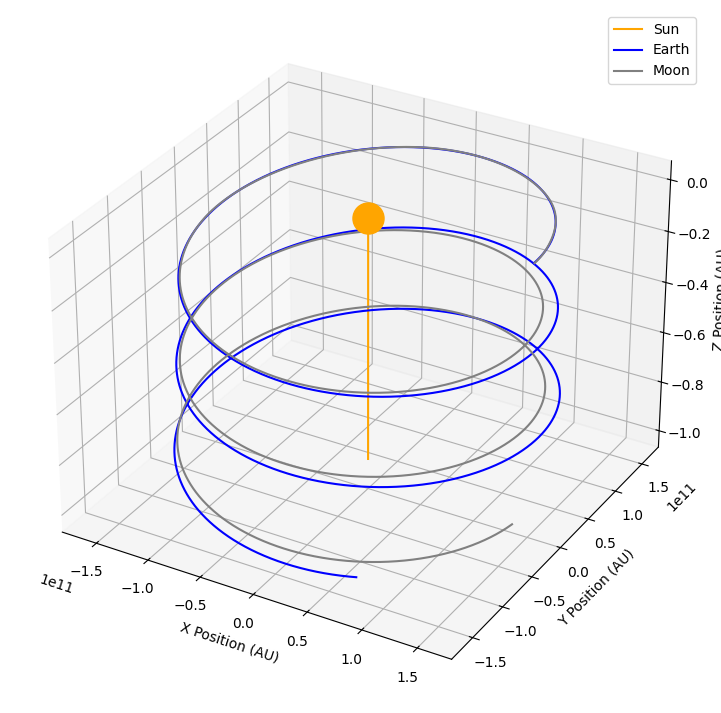

<Figure size 800x800 with 0 Axes>

In [339]:
# Plot Trajectories (Full System View)
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot the Sun's trajectory with an orange line
ax.plot(history[:, 0, 0], history[:, 0, 1], history[:, 0, 2], 
        label="Sun", color='orange')  # Sun in orange

# Plot Earth's trajectory in blue
ax.plot(history[:, 1, 0], history[:, 1, 1], history[:, 1, 2], 
        label="Earth", color='blue')  # Earth in blue

# Plot Moon's trajectory in grey
ax.plot(history[:, 2, 0], history[:, 2, 1], history[:, 2, 2], 
        label="Moon", color='gray')  # Moon in grey

# Scatter plot for the Sun (starting position) for visibility
ax.scatter(history[0, 0, 0], history[0, 0, 1], history[0, 0, 2], 
           color='orange', s=500)  # Large Sun marker

# Axis Labels
ax.set_xlabel("X Position (AU)")
ax.set_ylabel("Y Position (AU)")
ax.set_zlabel("Z Position (AU)")

# Show Legend
ax.legend()
plt.ion()
plt.show()

# Create Figure
fig = plt.figure(figsize=(8, 8))
#ax = fig.add_subplot(111, projection='3d')


# Normalize positions so Earth is at (0,0,0)
moon_orbit = history[:, 2] - history[:, 1]  # Moon's motion relative to Earth

# Plot Earth's motion at the center
ax.scatter(0, 0, 0, color='blue', s=100, label="Earth")

# Plot Moon's orbit around Earth
ax.plot(moon_orbit[:, 0], moon_orbit[:, 1], moon_orbit[:, 2], 
        label="Moon's Orbit", color='gray')

# Adjust limits for Earth-Moon distance (~384,000 km)
ax.set_xlim([-5e8, 5e8])  # ±500,000 km
ax.set_ylim([-5e8, 5e8])
ax.set_zlim([-5e8, 5e8])

# Set axis labels
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_zlabel("Z Position (m)")
ax.set_title("Moon's Orbit Around Earth (Zoomed-In)")

# Show Legend
ax.legend()
plt.show()


## Runge–Kutta methods